<a href="http://isa.uniovi.es/GSDPI"><img width=80% src="http://isa.uniovi.es//~idiaz/logos/header_gsdpi_somuniovi.png" alt=""></a>

____________________

# MNIST Example
We show here the use of somuniovi to visualize the MNIST digit dataset. In this example, we treat the (28,28) images of the digits as vectors of 28 x 28 = 784 dimensions, and are later reshaped to 28 x 28 for visualization of the results.

1. Import libraries
2. Input dataset
3. Create and  initialize a SOM model
4. Train the SOM model
5. SOM distance matrix
6. Visualize the SOM
7. Project new test data

### 1. Import libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import somuniovi as som

### 2. Input dataset

In [2]:
# Import dataset from tf
(xtrn,ytrn),(xtst,ytst) = tf.keras.datasets.mnist.load_data()

# Flatten images with shape (28,28) to vectors with shape (784,)
idx = range(0,60000,10)
xtrn = xtrn.reshape(60000,784).T/255

### 3. Create and  initialize a SOM model
PCA initialization by spreading the two dimensions of the SOM lattice along the principal directions of the data. It can be done very quickly and creates a linear approximation that a) is ordered and b) roughly spans the data. This sets up a good starting point for the SOM.

In [3]:
# Create index set to train: we shall use 1 each 10 digits
idx = np.random.permutation(60000)[:6000]

# Create and train SOM
a = som.SOM(xtrn[:,idx],dims=(50,50))

# PCA intialization
a.pca_init(xtrn[:,idx])

### 4. Train the SOM model
We well follow some steps for that:
* Do a first training from a large neighborhood (good topology preservation) ending in a small neighborhood (good data approximation, low quantization errors).
* Fine-tune the SOM model keeping a small neighborhood (further enhance data approximation).

In [4]:
# SOM training
a.train(xtrn[:,idx],epochs=10,N_initial=5,N_final=1)

# SOM training (fine-tuning)
a.train(xtrn[:,idx],epochs=10,N_initial=1,N_final=1)

Epoch: 0 	 Neigh 5.000000 	 MSE = 43.814846
Epoch: 1 	 Neigh 4.555556 	 MSE = 37.407239
Epoch: 2 	 Neigh 4.111111 	 MSE = 31.264154
Epoch: 3 	 Neigh 3.666667 	 MSE = 28.209353
Epoch: 4 	 Neigh 3.222222 	 MSE = 26.756609
Epoch: 5 	 Neigh 2.777778 	 MSE = 25.756399
Epoch: 6 	 Neigh 2.333333 	 MSE = 24.913329
Epoch: 7 	 Neigh 1.888889 	 MSE = 24.051423
Epoch: 8 	 Neigh 1.444444 	 MSE = 23.106708
Epoch: 9 	 Neigh 1.000000 	 MSE = 21.999387
Epoch: 0 	 Neigh 1.000000 	 MSE = 20.566909
Epoch: 1 	 Neigh 1.000000 	 MSE = 20.426904
Epoch: 2 	 Neigh 1.000000 	 MSE = 20.376088
Epoch: 3 	 Neigh 1.000000 	 MSE = 20.350616
Epoch: 4 	 Neigh 1.000000 	 MSE = 20.339388
Epoch: 5 	 Neigh 1.000000 	 MSE = 20.332081
Epoch: 6 	 Neigh 1.000000 	 MSE = 20.327374
Epoch: 7 	 Neigh 1.000000 	 MSE = 20.326235
Epoch: 8 	 Neigh 1.000000 	 MSE = 20.325642
Epoch: 9 	 Neigh 1.000000 	 MSE = 20.325382


### 5. SOM distance matrix
The SOM distance matrix computes an average of the distance between each neuron and its closest neighbours. Plotting this average distance for each node, results in a new map (component plane) that reveals how much the SOM is "stretched" on each region of the map. Since the SOM actually approximates the density function of the input data, this in turn reveals clusters, because the SOM prototypes are more densely distributed in regions of large densities, hence showing up small distances. Large distances, in turn, reveal low density regions, allowing to show borders between clusters.

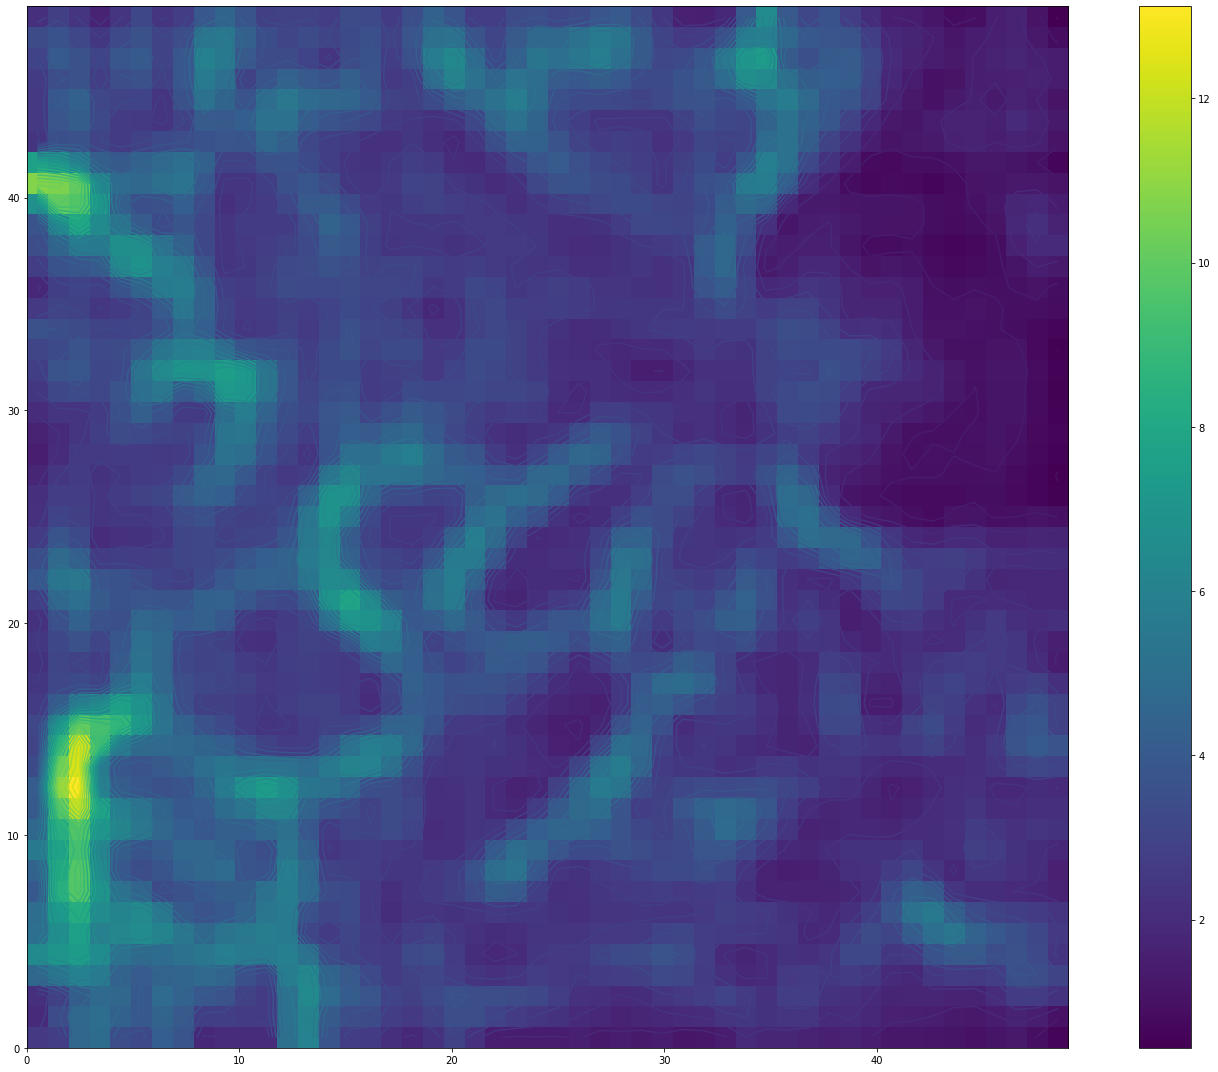

In [5]:
# compute the SOM distance map
d = a.somdist()

# plot it's component plane
plt.figure(figsize=(20,15))
som.planes(d,a.gi,a.dims)
plt.show()

### 6. Visualize the SOM 
After training, the ni x nj codebooks of the SOM will actually be "prototypes" of the actual data numbers, so they will look like numbers. In addition, the SOM lays them in a topologically ordered fashion, that is, close digits in the map will be close in the input 784D space, i.e. they will look similar.

At the same time, the SOM codebooks will try to span the whole dataset, so for almost every input digit, there will be a close ("similar") prototype. In other words, we will see in the map a broad catalog of the digits that in addition is ordered by similarities, being easy to grasp.

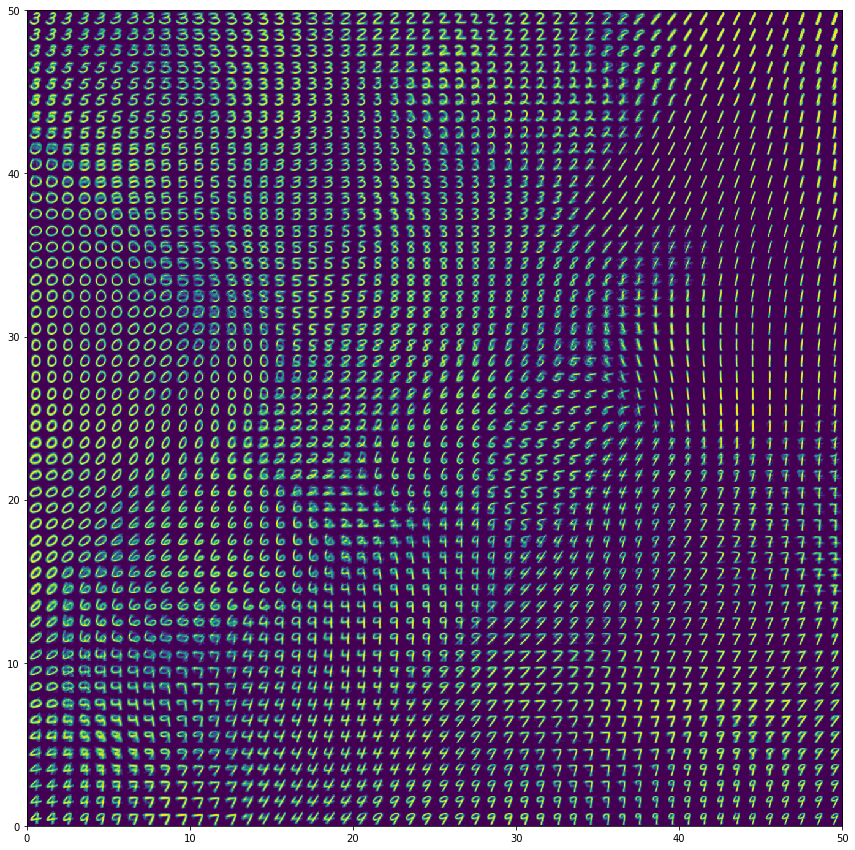

In [6]:
plt.figure(figsize=(15,15))
for i in range(0,2500):
    extent = [a.gi[0,i],a.gi[0,i]+1,a.gi[1,i],a.gi[1,i]+1]
    plt.imshow(a.mi[:,i].reshape(28,28),extent=extent)
plt.axis([0,50,0,50])
plt.show()

### 7. Project new test data

We will choose a digit (e.g. "7"), get all the digits in the dataset and project them on the SOM map, by assigning the best matching (most "similar") prototype, and will place them in the (i,j) position of this prototype. 

We can see that the nubmers typically fall in the region of the "7's", and eventually in other regions if the digit is oddly written and can be confused with other numbers

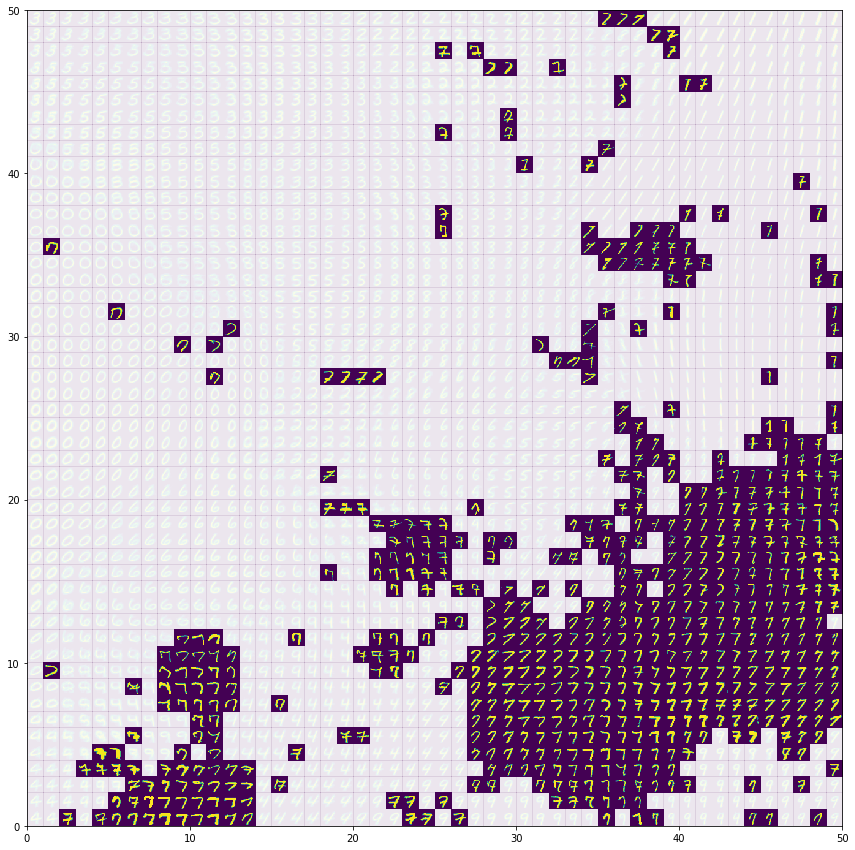

In [7]:
idx = np.where(ytrn==7)[0]

# project the digits on the SOM
pr = a.fproj(xtrn[:,idx])[0]

# visualize the results
plt.figure(figsize=(15,15))

# plot the original SOM codebooks using a small alpha to have some context
for i in range(0,2500):
    extent = [a.gi[0,i],a.gi[0,i]+1,a.gi[1,i],a.gi[1,i]+1]
    plt.imshow(a.mi[:,i].reshape(28,28),extent=extent,alpha=0.1)

# plot the actual test digits in their positions on the map, over the codebooks
for i in range(0,pr.shape[1]):
    extent = [pr[0,i],pr[0,i]+1,pr[1,i],pr[1,i]+1]
    plt.imshow(xtrn[:,idx[i]].reshape(28,28),extent=extent)
plt.axis([0,50,0,50])
plt.show()